In [1]:
!pip install matplotlib
! pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
print(5)

5


In [3]:
import json

# Open the JSON file
with open('output.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

alephLos = []
alephHis = []
expectedreturn = []

print(data)



# Access the data
for element in data:
    expectedreturn.append(element['value1'])
    alephLos.append(element['value2'])
    alephHis.append(element['value3'])





[{'key1': 'expectedIndicator', 'value1': 0.7, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'aleph0Hi', 'value3': 1.2}, {'key1': 'expectedIndicator', 'value1': 0.7999999999999998, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'aleph0Hi', 'value3': 1.4}, {'key1': 'expectedIndicator', 'value1': 0.8999999999999998, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'aleph0Hi', 'value3': 1.6}, {'key1': 'expectedIndicator', 'value1': 0.9999999999999994, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'aleph0Hi', 'value3': 1.8}, {'key1': 'expectedIndicator', 'value1': 0.9027190660252813, 'key2': 'alephLo', 'value2': 0.2, 'key3': 'aleph0Hi', 'value3': 2}, {'key1': 'expectedIndicator', 'value1': 0.8000000000000004, 'key2': 'alephLo', 'value2': 0.4, 'key3': 'aleph0Hi', 'value3': 1.2}, {'key1': 'expectedIndicator', 'value1': 0.8999999999999997, 'key2': 'alephLo', 'value2': 0.4, 'key3': 'aleph0Hi', 'value3': 1.4}, {'key1': 'expectedIndicator', 'value1': 0.9999999999999994, 'key2': 'alephLo', 'value2': 0.4, 'key3': 'ale

## Do a 3D plot of the expected return

C:\Users\david\AppData\Local\Temp\ipykernel_6240\958218491.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_flat, y_flat, z_flat, c= colors, cmap='viridis')


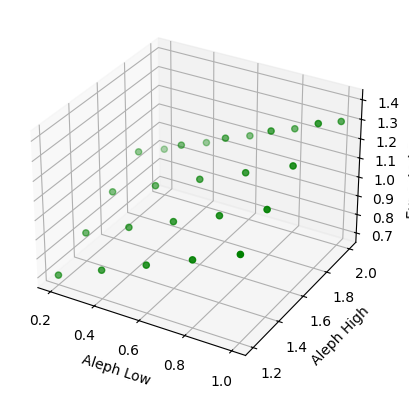

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 5x5 grid of values (you can replace this with your data)
grid_values = np.random.rand(5, 5)

# Create a mesh grid for x and y values
x, y = np.array(alephLos), np.array(alephHis)

# Flatten the grid and corresponding values
x_flat = x.flatten()
y_flat = y.flatten()
z_flat = np.array(expectedreturn).reshape(25,)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = np.where((z_flat >= x_flat) & (z_flat <= y_flat), 'green', 'red')


# Scatter plot for each combination of values
ax.scatter(x_flat, y_flat, z_flat, c= colors, cmap='viridis')

# Set labels for axes
ax.set_xlabel('Aleph Low')
ax.set_ylabel('Aleph High')
ax.set_zlabel('Expected Return')

# Show the plot
plt.show()


## Now we fix a specific aleph, and rotate lambda max.



In [5]:
with open('rotatemaxLambda.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

aleph0 = 1.2
maxLambda = []
expectedreturn = []

print(data)



# Access the data
for element in data:
    expectedreturn.append(element['value1'])
    maxLambda.append(element['value3'])

[{'key1': 'expectedIndicator', 'value1': -0.5234374999999998, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.5}, {'key1': 'expectedIndicator', 'value1': -0.39101350124999973, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.55}, {'key1': 'expectedIndicator', 'value1': -0.24783616000000022, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.6}, {'key1': 'expectedIndicator', 'value1': -0.09853003062499971, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.65}, {'key1': 'expectedIndicator', 'value1': 0.05078202000000007, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.7}, {'key1': 'expectedIndicator', 'value1': 0.4341186523437498, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.75}, {'key1': 'expectedIndicator', 'value1': 0.70174592, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.8}, {'key1': 'expectedIndicator', 'value1': 0.9711826865624996

In [6]:
print(aleph0)

1.2


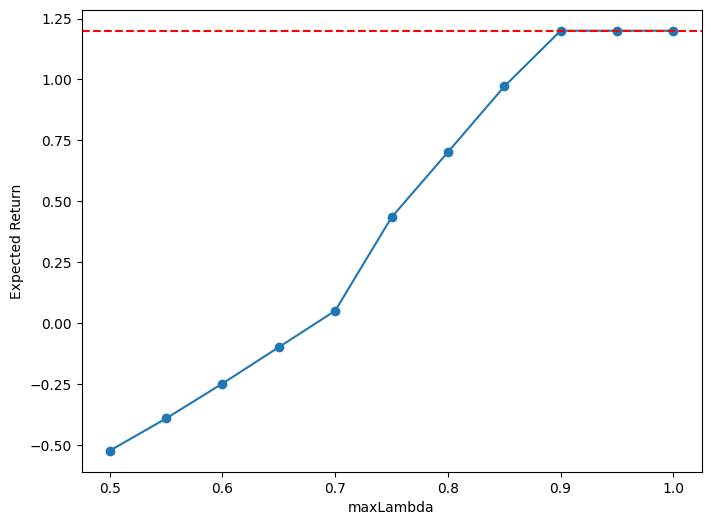

In [7]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(maxLambda, expectedreturn, marker='o', linestyle='-')

# Add a diagonal line representing the target value
plt.axhline(aleph0, color='red', linestyle='--', label='Aleph0')
plt.xlabel("maxLambda")
plt.ylabel("Expected Return")
plt.show()


## Now we fix a specific aleph, and rotate lambda min.

In [8]:
with open('rotateminLambda.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)

aleph0 = 1.2
minlambda = []
expectedreturn = []

print(data)



# Access the data
for element in data:
    expectedreturn.append(element['value1'])
    minlambda.append(element['value2'])

[{'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'minLambda', 'value2': 0, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.2000000000000004, 'key2': 'minLambda', 'value2': 0.05, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'minLambda', 'value2': 0.1, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'minLambda', 'value2': 0.15, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.1999999999999997, 'key2': 'minLambda', 'value2': 0.2, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.2000000000000002, 'key2': 'minLambda', 'value2': 0.25, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.199999999999999, 'key2': 'minLambda', 'value2': 0.3, 'key3': 'maxLambda', 'value3': 0.9}, {'key1': 'expectedIndicator', 'value1': 1.2000000000000002, 'key2': 

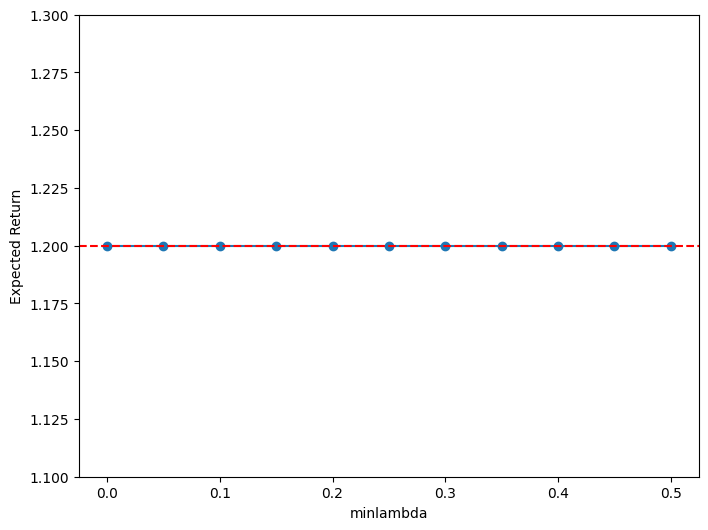

<Figure size 640x480 with 0 Axes>

In [9]:
# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(minlambda, expectedreturn, marker='o', linestyle='-')

# Add a diagonal line representing the target value
plt.axhline(aleph0, color='red', linestyle='--', label='Aleph0')
plt.xlabel("minlambda")
plt.ylabel("Expected Return")
plt.ylim(min(expectedreturn) - 0.1, max(expectedreturn) + 0.1)  # Adjust the limits as needed
plt.show()
plt.savefig("out.png")

## Where does the expected return lie within the interval [aleph lo, aleph hi]?

In [ ]:

perc = (z_flat - x_flat) / (y_flat - x_flat)

C:\Users\david\AppData\Local\Temp\ipykernel_6240\1363034360.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(x_flat, y_flat, z_flat, cmap='viridis')
C:\Users\david\AppData\Local\Temp\ipykernel_6240\1363034360.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x_flat, y_flat, z_flat, cmap='viridis')


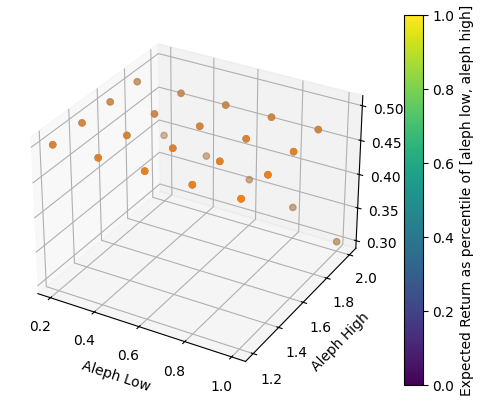

In [17]:
## Max Lambda: 0.99, // upper bound on local relative aspiration in each step (must be minLambda...1)

x_flat = x.flatten()
y_flat = y.flatten()
z_flat = np.array(perc).reshape(25,)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(x_flat, y_flat, z_flat, cmap='viridis')
cbar = plt.colorbar(scatter)
cbar.set_label('Expected Return as percentile of [aleph low, aleph high]')

# Scatter plot for each combination of values
ax.scatter(x_flat, y_flat, z_flat, cmap='viridis')

# Set labels for axes
ax.set_xlabel('Aleph Low')
ax.set_ylabel('Aleph High')
ax.set_zlabel('Expected Return')

# Show the plot
plt.show()


In [30]:
with open('check_standarddeviation.json', 'r') as json_file:
    # Load the JSON data
    data = json.load(json_file)
print(data)

import matplotlib.pyplot as plt
import numpy as np

# Create x values from 0 to 3.0 in 0.1 increments

# Replace these with your own expected return and variance values

expected_return = []
variance = []

for elements in data:
    expected_return.append(elements["value1"])
    variance.append(elements['value2'])

print(len(expected_return))

[{'key1': 'expectedIndicator', 'value1': 3.885780586188048e-16, 'key2': 'standard deviation', 'value2': 0.5116817192534648}, {'key1': 'expectedIndicator', 'value1': 0.10000000000000048, 'key2': 'standard deviation', 'value2': 0.42533409328325716}, {'key1': 'expectedIndicator', 'value1': 0.19999999999999965, 'key2': 'standard deviation', 'value2': 0.3222669152537651}, {'key1': 'expectedIndicator', 'value1': 0.29999999999999993, 'key2': 'standard deviation', 'value2': 0.3031962769124791}, {'key1': 'expectedIndicator', 'value1': 0.4000000000000001, 'key2': 'standard deviation', 'value2': 0.24959361156243562}, {'key1': 'expectedIndicator', 'value1': 0.4999999999999996, 'key2': 'standard deviation', 'value2': 0.24728219803776832}, {'key1': 'expectedIndicator', 'value1': 0.6000000000000012, 'key2': 'standard deviation', 'value2': 0.9563186992553547}, {'key1': 'expectedIndicator', 'value1': 0.7000000000000007, 'key2': 'standard deviation', 'value2': 0.8852323783258059}, {'key1': 'expectedIndi

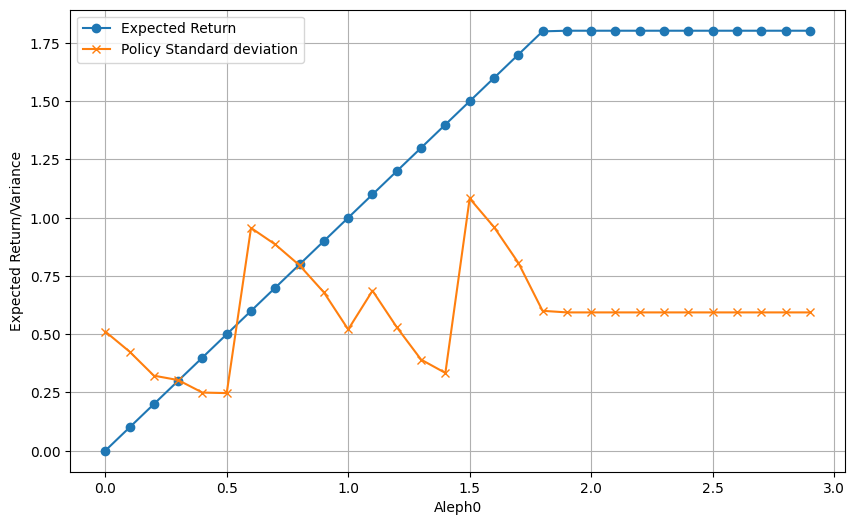

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Create x values from 0 to 3.0 in 0.1 increments
x = np.arange(0, 3.0, 0.1)


# Create a figure and axis
plt.figure(figsize=(10, 6))
plt.plot(x, expected_return, label='Expected Return', marker='o')
plt.plot(x, variance, label='Policy Standard deviation', marker='x')

# Add labels and a legend
plt.xlabel('Aleph0')
plt.ylabel('Expected Return/Variance')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()
